<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/%EC%A7%80%EB%8F%84%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#예제 연습1

In [0]:
!pip install plotnine
!pip install missingno


In [0]:
#!pip show plotnine
#!pip show missingno


import pandas as pd
import numpy as np
import re

from plotnine import *


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
pre_sale=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/201807.csv',encoding='euc-kr',engine='python')

In [0]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [0]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2885,제주,전체,2018,7,3334
2886,제주,전용면적 60㎡이하,2018,7,NaN
2887,제주,전용면적 60㎡초과 85㎡이하,2018,7,3356
2888,제주,전용면적 85㎡초과 102㎡이하,2018,7,3226
2889,제주,전용면적 102㎡초과,2018,7,2990


In [0]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 5 columns):
지역명        2890 non-null object
규모구분       2890 non-null object
연도         2890 non-null int64
월          2890 non-null int64
분양가격(㎡)    2750 non-null object
dtypes: int64(2), object(3)
memory usage: 113.0+ KB


In [0]:
type(pre_sale['연도'][0])

str

##데이터 형 변환

In [0]:
#연도와 월은 카테고리 형태의 데이터이기 때문에 스트링 형태로 변경
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)

pre_sale_price = pre_sale['분양가격(㎡)']

In [0]:
# 분양가격의 타입을 숫자로 변경해 줍니다.
pre_sale['분양가격'] = pd.to_numeric(pre_sale_price, errors='coerce')

In [0]:
#평당 분양가격
pre_sale['평당분양가격']=pre_sale['분양가격']*3.3

In [0]:
pre_sale['규모구분'].value_counts()
pre_sale['지역명'].value_counts()

경북    170
부산    170
서울    170
대구    170
전남    170
인천    170
충남    170
광주    170
대전    170
충북    170
전북    170
울산    170
경기    170
경남    170
세종    170
제주    170
강원    170
Name: 지역명, dtype: int64

##문제 1. 전국평균 분양가격 확인하기

In [0]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [0]:
mean_korea1 = pre_sale['분양가격'].groupby([pre_sale['연도'],pre_sale['지역명']]).mean().reset_index(name='연도별지역평균')
mean_korea1.head()
#mean_korea.groupby([mean_korea.연도,mean_korea.지역명]).describe().T

,연도,지역명,연도별지역평균
0,2015,강원,2178.200000
1,2015,경기,3351.800000
2,2015,경남,2563.400000
3,2015,경북,2261.866667
4,2015,광주,2399.000000


##문제2: 규모별 전국 평균 분양가격

In [0]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [0]:
mean_korea2=pre_sale['평당분양가격'].groupby([pre_sale.규모구분,pre_sale.연도]).mean().reset_index(name='규모별평균')
mean_korea2.groupby([mean_korea2.연도,mean_korea2.규모구분]).describe().T
#pre_sale.pivot_table('평당분양가격', '규모구분', '연도')

연도                  2015             ...              2018              
규모구분         전용면적 102㎡초과 전용면적 60㎡이하  ... 전용면적 85㎡초과 102㎡이하            전체
규모별평균 count     1.000000      1.000  ...          1.000000      1.000000
      mean   9837.226667   8951.525  ...      11483.085542  10563.022689
      std            NaN        NaN  ...               NaN           NaN
      min    9837.226667   8951.525  ...      11483.085542  10563.022689
      25%    9837.226667   8951.525  ...      11483.085542  10563.022689
      50%    9837.226667   8951.525  ...      11483.085542  10563.022689
      75%    9837.226667   8951.525  ...      11483.085542  10563.022689
      max    9837.226667   8951.525  ...      11483.085542  10563.022689

[8 rows x 20 columns]

##문제 3: 전국 분양가 변동금액

In [0]:
#규모구분에서 전체로 되어있는 데이터만 가져온다.
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [0]:
kk=pre_sale[pre_sale.규모구분=='전체']

dong=kk[['평당분양가격','지역명','연도']]

Dong=dong['평당분양가격'].groupby([dong.지역명,dong.연도]).mean().reset_index()
Dong.head()



a1=(Dong[Dong['연도']=='2018']).reset_index()
a2=(Dong[Dong['연도']=='2017']).reset_index()
a3=(Dong[Dong['연도']=='2016']).reset_index()
a4=(Dong[Dong['연도']=='2015']).reset_index()

#answer1=pd.DataFrame()

#answer1['지역명']=a1['지역명']
#answer1['1817']=a1['평당분양가격']-a2['평당분양가격']
#answer1['1716']=a2['평당분양가격']-a3['평당분양가격']
#answer1['1615']=a3['평당분양가격']-a4['평당분양가격']


,지역명,연도,평당분양가격
0,강원,2015,7159.900000
1,강원,2016,7011.125000
2,강원,2017,7126.800000
3,강원,2018,7640.914286
4,경기,2015,10377.400000
5,경기,2016,11220.000000
6,경기,2017,11850.000000
7,경기,2018,12880.842857
8,경남,2015,7585.600000
9,경남,2016,7847.950000


In [0]:
region_year_all = pre_sale.loc[pre_sale['규모구분'] == '전체']
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()

region_year

region_year['변동액'] = (region_year['2018'] - region_year['2015']).astype(int)
max_delta_price = np.max(region_year['변동액'])*1000
min_delta_price = np.min(region_year['변동액'])*1000
mean_delta_price = np.mean(region_year['변동액'])*1000

region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,7159.9,7011.125,7126.8,7640.914286,481
1,경기,10377.4,11220.000,11850.0,12880.842857,2503
2,경남,7585.6,7847.950,8119.8,8894.442857,1308
3,경북,7170.9,7360.650,7794.9,8341.928571,1171
4,광주,8052.0,8898.725,9463.5,9637.885714,1585
5,대구,9232.3,10310.025,11455.8,11737.157143,2504
6,대전,8098.2,8501.625,9044.7,9604.414286,1506
7,부산,10307.0,10429.925,11577.9,12756.385714,2449
8,서울,19725.2,20663.500,21375.9,22328.742857,2603
9,세종,8750.5,8860.500,9135.3,10374.728571,1624


##그래프 그리기(중요)

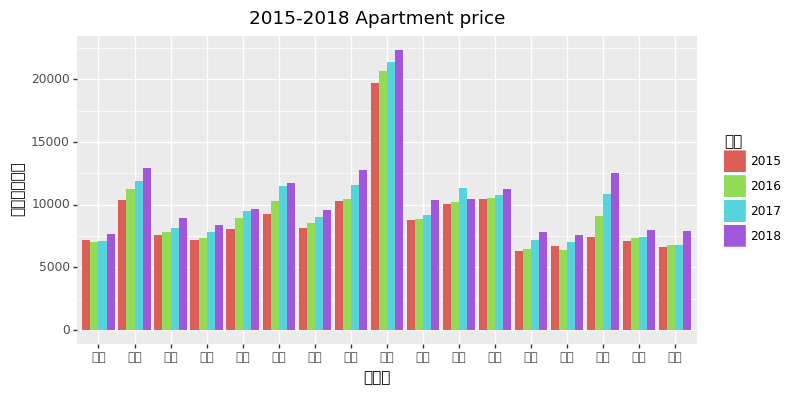

<ggplot: (-9223363282286771533)>

In [0]:
#연도별 변동 그래프

(ggplot(Dong, aes(x='지역명', y='평당분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('2015-2018 Apartment price')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


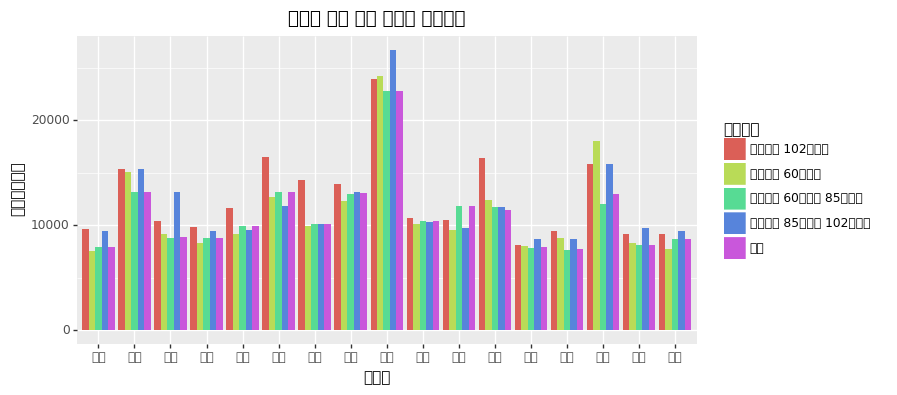

<ggplot: (8783619716693)>

In [0]:
#지역별 평당 분양가격 합계

(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


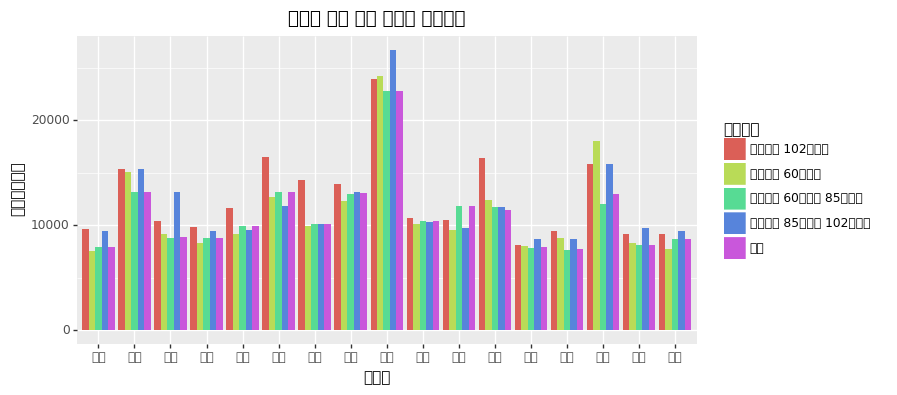

<ggplot: (-9223363253235067097)>

In [0]:
#지역별 평당 분양가격 합계

pre_sale.pivot_table('평당분양가격', '규모구분', '지역명')


#규모별 분양가격 합계

(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + ggtitle('규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(8, 4))
)


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:449: UserWarning: geom_bar : Removed 232 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


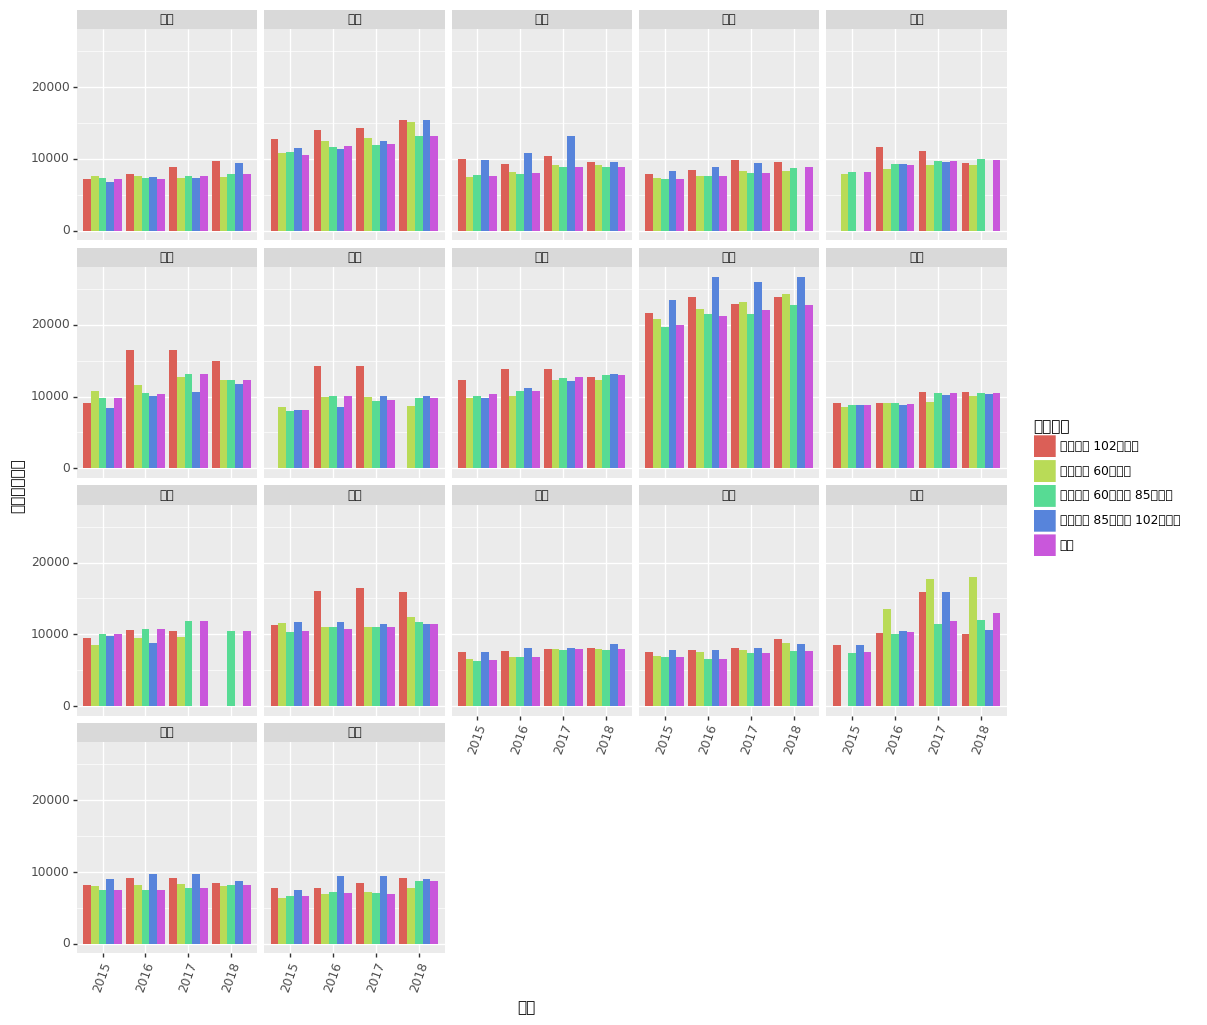

<ggplot: (-9223363253235837096)>

In [0]:
# 위에 그린 그래프를 지역별로 나눠 봅니다.
(ggplot(pre_sale)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumBarunGothic'),
         axis_text_x=element_text(rotation=70),
         figure_size=(12, 12))
)


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 232 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)


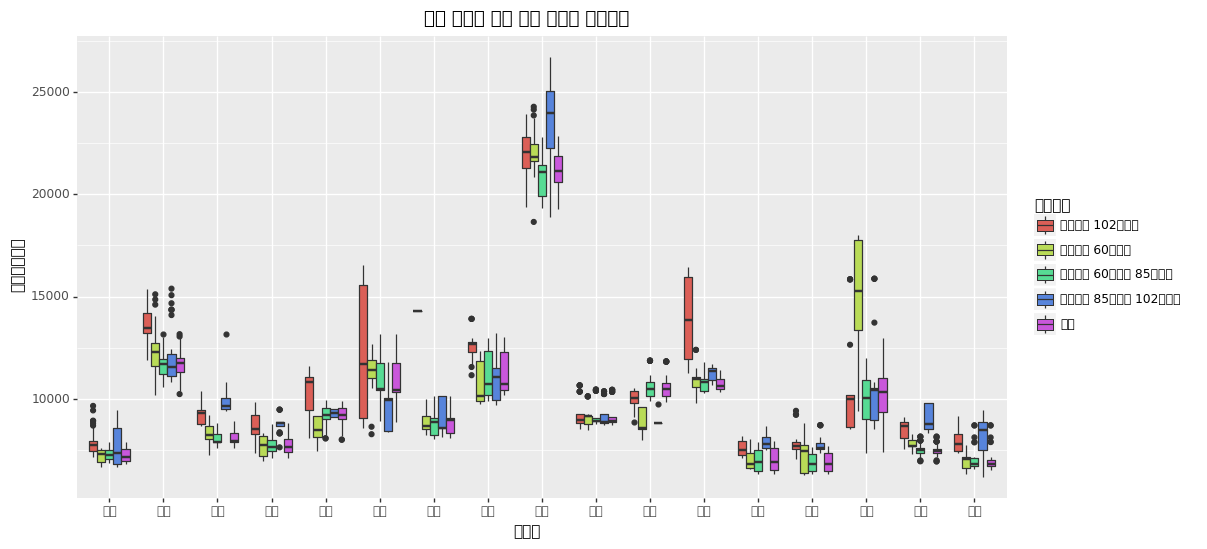

<ggplot: (-9223363253238627647)>

In [0]:
# 박스플롯을 그려봅니다.
(ggplot(pre_sale, aes(x='지역명', y='평당분양가격', fill='규모구분'))
 + geom_boxplot()
 + ggtitle('전국 규모별 신규 민간 아파트 분양가격')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: UserWarning: stat_boxplot : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


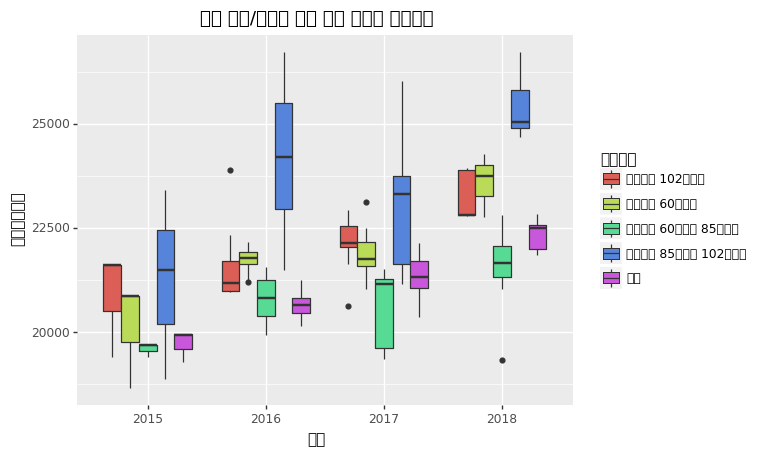

<ggplot: (8783615192626)>

In [0]:
pre_sale_seoul = pre_sale.loc[pre_sale['지역명']=='서울']
(ggplot(pre_sale_seoul)
 + aes(x='연도', y='평당분양가격', fill='규모구분')
 + ggtitle('서울 연도/규모별 신규 민간 아파트 분양가격')
 + geom_boxplot()
 + theme(text=element_text(family='Malgun Gothic'))
)


#예제 연습2
2013년 12월 부터 2015년 9월까지의 데이터 시각화 하기

In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/avgcode.csv',
               encoding='euc-kr',skiprows=1,header=0)

df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,구분,NaN,2013년,2014년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015년,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(단위: 천원/3.3㎡)
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612","7,622","7,802","7,707","7,752","7,748","7,752","7,756","7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333","8,333","8,048","8,038","8,067","8,067","8,067","8,067","8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153","8,493","8,493","8,627","8,891","8,891","8,526","8,526","8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [0]:
year=df.iloc[0]
month=df.iloc[1]

In [0]:
year

Unnamed: 0                구분
Unnamed: 1               NaN
Unnamed: 2             2013년
Unnamed: 3             2014년
Unnamed: 4               NaN
Unnamed: 5               NaN
Unnamed: 6               NaN
Unnamed: 7               NaN
Unnamed: 8               NaN
Unnamed: 9               NaN
Unnamed: 10              NaN
Unnamed: 11              NaN
Unnamed: 12              NaN
Unnamed: 13              NaN
Unnamed: 14              NaN
Unnamed: 15            2015년
Unnamed: 16              NaN
Unnamed: 17              NaN
Unnamed: 18              NaN
Unnamed: 19              NaN
Unnamed: 20              NaN
Unnamed: 21              NaN
Unnamed: 22              NaN
Unnamed: 23              NaN
Unnamed: 24              NaN
Unnamed: 25              NaN
Unnamed: 26    (단위: 천원/3.3㎡)
Name: 0, dtype: object

In [0]:
month

Unnamed: 0        시도
Unnamed: 1       시군구
Unnamed: 2       12월
Unnamed: 3        1월
Unnamed: 4        2월
Unnamed: 5        3월
Unnamed: 6        4월
Unnamed: 7        5월
Unnamed: 8        6월
Unnamed: 9        7월
Unnamed: 10       8월
Unnamed: 11       9월
Unnamed: 12      10월
Unnamed: 13      11월
Unnamed: 14      12월
Unnamed: 15       1월
Unnamed: 16       2월
Unnamed: 17       3월
Unnamed: 18       4월
Unnamed: 19       5월
Unnamed: 20       6월
Unnamed: 21       7월
Unnamed: 22       8월
Unnamed: 23       9월
Unnamed: 24      전월비
Unnamed: 25     전년말비
Unnamed: 26    전년동월비
Name: 1, dtype: object

In [0]:
for i,y in enumerate(year):  # for i in range(0,27)  여기 enumerate()에서는 y가 따로 안쓰임
  if i>2 and i<15:
    year[i]=" ".join(['2014년',month[i]])
  elif i>=15:
    year[i]=' '.join(['2015년',month[i]])
  elif i ==2:
    year[i]=' '.join([year[i],month[i]])
  elif i ==1:
    year[i]= '시군구'

print(year)

Unnamed: 0                    구분
Unnamed: 1                   시군구
Unnamed: 2     2013년 12월 12월 12월
Unnamed: 3              2014년 1월
Unnamed: 4              2014년 2월
Unnamed: 5              2014년 3월
Unnamed: 6              2014년 4월
Unnamed: 7              2014년 5월
Unnamed: 8              2014년 6월
Unnamed: 9              2014년 7월
Unnamed: 10             2014년 8월
Unnamed: 11             2014년 9월
Unnamed: 12            2014년 10월
Unnamed: 13            2014년 11월
Unnamed: 14            2014년 12월
Unnamed: 15             2015년 1월
Unnamed: 16             2015년 2월
Unnamed: 17             2015년 3월
Unnamed: 18             2015년 4월
Unnamed: 19             2015년 5월
Unnamed: 20             2015년 6월
Unnamed: 21             2015년 7월
Unnamed: 22             2015년 8월
Unnamed: 23             2015년 9월
Unnamed: 24            2015년 전월비
Unnamed: 25           2015년 전년말비
Unnamed: 26          2015년 전년동월비
Name: 0, dtype: object


In [0]:
df.columns=year

In [0]:
df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
0,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
1,시도,시군구,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,1월,2월,3월,4월,5월,6월,7월,8월,9월,전월비,전년말비,전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,NaN,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612","7,622","7,802","7,707","7,752","7,748","7,752","7,756","7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,NaN,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333","8,333","8,048","8,038","8,067","8,067","8,067","8,067","8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,NaN,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153","8,493","8,493","8,627","8,891","8,891","8,526","8,526","8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722


In [0]:
#중복되는 내용 삭제

#df=df.drop(df.index[[0,1]]) 1번만 시행하기
df.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,NaN,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,NaN,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,NaN,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,NaN,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131


In [0]:
df['구분']
df['구분']=df['구분'].fillna('')
df['시군구']=df['시군구'].fillna('')

df

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434"
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131
7,,광주,"6,098","7,326","7,611","7,346","7,346","7,523","7,659","7,612","7,622","7,802","7,707","7,752","7,748","7,752","7,756","7,861","7,914","7,877","7,881","8,089","8,231","8,083",-148,334,281
8,,대전,"8,321","8,321","8,321","8,341","8,341","8,341","8,333","8,333","8,333","8,048","8,038","8,067","8,067","8,067","8,067","8,067","8,145","8,272","8,079","8,079","8,079","7,917",68,610,414
9,,울산,"8,090","8,090","8,090","8,153","8,153","8,153","8,153","8,153","8,493","8,493","8,627","8,891","8,891","8,526","8,526","8,629","9,380","9,192","9,190","9,190","9,215","9,215",0,324,722
10,,,"8,151","8,355","8,597","8,552","8,585","8,606","8,669","8,648","8,700","8,671","8,650","8,730","8,698","8,649","8,646","8,692","8,858","8,967","8,942","8,984","9,058","9,023",-36,325,352
11,경기,,"10,855","10,855","10,791","10,784","10,876","10,646","10,266","10,124","10,134","10,501","10,397","10,356","10,379","10,391","10,355","10,469","10,684","10,685","10,573","10,518","10,573","10,341",-232,-38,-160


In [0]:
df['지역']=df['구분']+df['시군구']

df.head()

,구분,시군구,2013년 12월,2014년 1월,2014년 2월,2014년 3월,2014년 4월,2014년 5월,2014년 6월,2014년 7월,2014년 8월,2014년 9월,2014년 10월,2014년 11월,2014년 12월,2015년 1월,2015년 2월,2015년 3월,2015년 4월,2015년 5월,2015년 6월,2015년 7월,2015년 8월,2015년 9월,2015년 전월비,2015년 전년말비,2015년 전년동월비,지역
2,전국,,"8,059","8,130","8,195","8,204","8,289","8,358","8,344","8,333","8,395","8,459","8,488","8,569","8,584","8,605","8,602","8,563","8,613","8,624","8,627","8,643","8,678","8,665",-13,82,207,전국
3,서울,,"18,189","17,925","17,925","18,016","18,098","19,446","18,867","18,742","19,274","19,404","19,759","20,242","20,269","20,670","20,670","19,415","18,842","18,367","18,374","18,152","18,443","17,969",-474,"-2,300","-1,434",서울
4,6대광역시,부산,"8,111","8,111","9,078","8,965","9,402","9,501","9,453","9,457","9,411","9,258","9,110","9,208","9,208","9,204","9,235","9,279","9,327","9,345","9,515","9,559","9,581","9,608",1,430,477,6대광역시부산
5,,대구,"8,080","8,080","8,077","8,101","8,267","8,274","8,360","8,360","8,370","8,449","8,403","8,439","8,253","8,327","8,416","8,441","8,446","8,568","8,542","8,542","8,795","8,863",27,400,350,대구
6,,인천,"10,204","10,204","10,408","10,408","10,000","9,844","10,058","9,974","9,973","9,973","10,016","10,020","10,020","10,017","9,876","9,876","9,938","10,551","10,443","10,443","10,449","10,450",-162,-150,-131,인천


In [0]:
df_2013_2015=pd.melt(df,id_vars=['지역'],value_vars=['2013년 12월','2014년 1월','2014년 2월','2014년 3월',
       '2014년 4월','2014년 5월','2014년 6월','2014년 7월','2014년 8월',
       '2014년 9월','2014년 10월','2014년 11월','2014년 12월','2015년 1월',
       '2015년 2월','2015년 3월','2015년 4월','2015년 5월','2015년 6월',
       '2015년 7월','2015년 8월','2015년 9월'])


In [0]:
df_2013_2015

,지역,0,value
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"
5,광주,2013년 12월,"6,098"
6,대전,2013년 12월,"8,321"
7,울산,2013년 12월,"8,090"
8,,2013년 12월,"8,151"
9,경기,2013년 12월,"10,855"


##컬럼명 바꾸기

In [0]:
df_2013_2015.columns=['지역','기간','분양가']   
df_2013_2015.head()

,지역,기간,분양가
0,전국,2013년 12월,"8,059"
1,서울,2013년 12월,"18,189"
2,6대광역시부산,2013년 12월,"8,111"
3,대구,2013년 12월,"8,080"
4,인천,2013년 12월,"10,204"


##import re

In [0]:
df_2013_2015['연도']=df_2013_2015['기간'].apply(lambda x:x.split('년')[0])
df_2013_2015.head()

,지역,기간,분양가,연도
0,전국,2013년 12월,"8,059",2013
1,서울,2013년 12월,"18,189",2013
2,6대광역시부산,2013년 12월,"8,111",2013
3,대구,2013년 12월,"8,080",2013
4,인천,2013년 12월,"10,204",2013


In [0]:
df_2013_2015['월']=df_2013_2015['기간'].apply(
    lambda year_month:re.sub('월','',year_month.split('년')[1]).strip())
                                                               #안해도 됨 공백없애는 기능
df_2013_2015.head()

,지역,기간,분양가,연도,월
0,전국,2013년 12월,"8,059",2013,12
1,서울,2013년 12월,"18,189",2013,12
2,부산,2013년 12월,"8,111",2013,12
3,대구,2013년 12월,"8,080",2013,12
4,인천,2013년 12월,"10,204",2013,12


In [0]:
df_2013_2015['지역']=df_2013_2015['지역'].apply(
    lambda x:re.sub('6대광역시부산','부산',x))

In [0]:
df_2013_2015['지역']=df_2013_2015['지역'].apply(
    lambda x:re.sub('지방강원','강원',x))


In [0]:
df_2013_2015['분양가격']=df_2013_2015['분양가'].str.replace(',','').astype(int)

In [0]:
df_2013_2015.head()

,지역,기간,분양가,연도,월,분양가격
0,전국,2013년 12월,"8,059",2013,12,8059
1,서울,2013년 12월,"18,189",2013,12,18189
2,부산,2013년 12월,"8,111",2013,12,8111
3,대구,2013년 12월,"8,080",2013,12,8080
4,인천,2013년 12월,"10,204",2013,12,10204


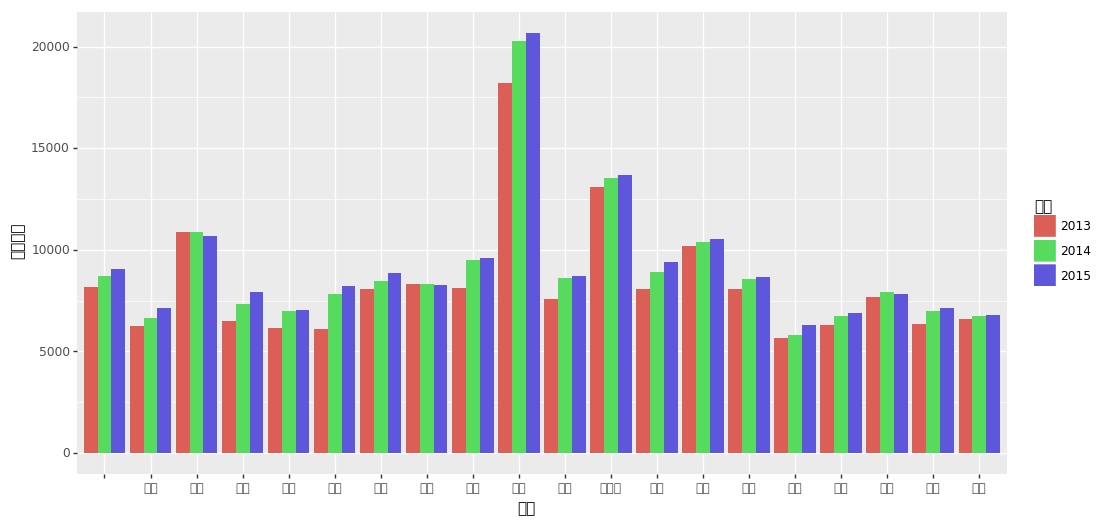

<ggplot: (-9223363253239735443)>

In [0]:
(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)

(ggplot(df_2013_2015, aes(x='지역', y='분양가격', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumBarunGothic'),
         figure_size=(12, 6))
)


#예제 3
2013년 12월~2018년 7월 전국 신규 민간 아파트 분양가격 동향 시각화

In [0]:
pre_sale=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/201807.csv',encoding='euc-kr',engine='python')

pre_sale.head()


pre_sale['연도']=pre_sale['연도'].astype(str)
pre_sale['월']=pre_sale['월'].astype(str)
pre_sale_price=pre_sale['분양가격(㎡)']
pre_sale['분양가격']=pd.to_numeric(pre_sale_price,errors='coerce')
pre_sale['평당분양가격']=pre_sale['분양가격']*3.3


#과제
배스킨라빈스와 던킨도너츠 입지분석

In [0]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns

In [0]:
#지도 시각화를 위해
import folium

#노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

In [0]:
#Window의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

shop_2018=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/shop_201806_01.csv',encoding='cp949')
shop_2018.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,28523551,엘가커피부산아시아드점,부산아시아드점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,26,부산광역시,26470,연제구,2647062000,거제2동,2647010100,거제동,2647010100212080000,1,대지,1208,NaN,부산광역시 연제구 거제동 1208,264703130033,부산광역시 연제구 종합운동장로,7,NaN,2647010100111980000009422,부산아시아드주경기장노외주차장,부산광역시 연제구 종합운동장로 7,611070,47500.0,NaN,1,NaN,129.062034,35.191284
1,28498271,비비안아울렛중계점,아울렛중계점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,11,서울특별시,11350,노원구,1135062500,중계2.3동,1135010600,중계동,1135010600205090000,1,대지,509,NaN,서울특별시 노원구 중계동 509,113504130198,서울특별시 노원구 동일로204가길,46,NaN,1135010600105090000010511,2001아울렛,서울특별시 노원구 동일로204가길 46,139726,1783.0,NaN,3,NaN,127.067888,37.641280
2,28512174,연세정신건강의학과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,NaN,11,서울특별시,11110,종로구,1111067000,창신1동,1111017400,창신동,1111017400202970000,1,대지,297,NaN,서울특별시 종로구 창신동 297,111103100013,서울특별시 종로구 종로,335,3.0,1111017400102990000005842,유림문화사,서울특별시 종로구 종로 335-3,110540,3104.0,NaN,2,NaN,127.014500,37.573196
3,28499926,독일지멘스보청기은평점,은평점,D,소매,D20,의약/의료품소매,D20A02,보청기판매,G47812,의료용 기구 소매업,11,서울특별시,11380,은평구,1138052000,불광1동,1138010300,불광동,1138010300202810108,1,대지,281,108.0,서울특별시 은평구 불광동 281-108,113803000008,서울특별시 은평구 통일로,732,NaN,1138010300102810108040063,NaN,서울특별시 은평구 통일로 732,122040,3368.0,NaN,2,NaN,126.929871,37.610888
4,28490321,서울모드,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168051000,신사동,1168010700,신사동,1168010700205170027,1,대지,517,27.0,서울특별시 강남구 신사동 517-27,116804166257,서울특별시 강남구 도산대로11길,29,NaN,1168010700105170027011767,SM빌딩,서울특별시 강남구 도산대로11길 29,135888,6034.0,NaN,1,NaN,127.022212,37.519315


In [0]:
shop_2018.shape #476183의 각각 개수에 39개의 속성이 들어있음

(476183, 39)

In [0]:
coffee= shop_2018[shop_2018['상권업종소분류명'].str.contains('커피')]
coffee.shape

(18759, 39)

In [0]:
coffee.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [0]:
# 상호명으로 봤을 때 커피점이 13472개가 있다.

coffee['상호명'].unique().shape

(13472,)

In [0]:
#df.loc[행 인덱스, 열 인덱스]

coffee.loc[coffee['상호명'].str.contains('스타벅스'),'상호명'].unique()

array(['스타벅스종로3가점', '스타벅스커피여의도IFC1F', '스타벅스', '스타벅스신림사거리점', '스타벅스커피홍대역',
       '스타벅스새문안로점', '스타벅스올림픽평화의문점', '스타벅스연신내역', '스타벅스가락시장역점', '스타벅스외대점',
       '스타벅스연세백양로점', '스타벅스명지대점', '스타벅스석촌역', '스타벅스연대동문', '스타벅스압구정로데오역',
       '스타벅스서울대입구역점', '스타벅스신림점', '스타벅스강남삼성타운점', '스타벅스사당점', '스타벅스광장점',
       '스타벅스신촌명물거리점', '스타벅스명동미래', '스타벅스건국클래식점', '스타벅스연희DT점', '스타벅스삼선교점',
       '스타벅스올림픽공원북문점', '스타벅스커피여의도호성', '스타벅스충정타워', '스타벅스종각점', '스타벅스방배카페입구',
       '스타벅스이수역점', '스타벅스W-MALL점', '스타벅스천호로데오점', '스타벅스마포일진빌딩점', '스타벅스용산역점',
       '스타벅스명동메트로', '스타벅스중계역점', '스타벅스마포아크로타워점', '스타벅스남부터미널2점',
       '스타벅스중랑구청점', '스타벅스구로디지털로점', '스타벅스논현힐탑', '스타벅스종로관수점', '스타벅스삼성도심공항점',
       '스타벅스부산서면', '스타벅스종로2가점', '스타벅스선정릉역점', '스타벅스미아역점', '스타벅스선릉로점',
       '스타벅스역삼럭키', '스타벅스커피신도림디큐브시티B2', '스타벅스이태원거리점', '스타벅스구로에이스트윈타워1점',
       '스타벅스을지로입구', '스타벅스교대역점', '스타벅스서울중앙우체국점', '스타벅스남산스테이트',
       '스타벅스구로하이엔드점', '스타벅스명일이마트점', '스타벅스조선호텔후문', '스타벅스목동점', '스타벅스삼성교점',
       '스타벅스서울교대점', '스타벅스커리학동사거리점', '스타벅스강북구청사거리점', '스타벅스청담사거리점',
       '스타

In [0]:
coffee['상권업종중분류명'].value_counts()

커피점/카페    18759
Name: 상권업종중분류명, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


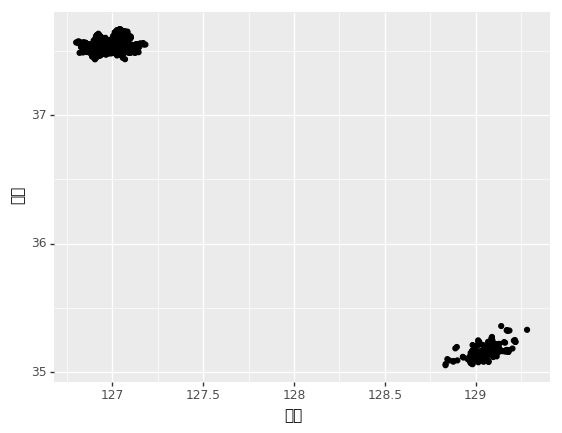

<ggplot: (8731565819347)>

In [0]:
 (ggplot(shop_2018[:1000])
  + aes(x='경도', y='위도')
  + geom_point()
  + theme(text=element_text(family='NanumBarunGothic'))
 )


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


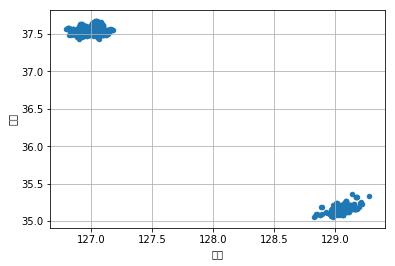

In [0]:
# (ggplot(shop_2018[:1000])
#  + aes(x='경도', y='위도')
#  + geom_point()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )

shop_2018[:1000].plot.scatter(x="경도",y="위도",grid="True")

In [0]:
df_seoul=shop_2018.loc[shop_2018['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(330089, 39)

In [0]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          285856
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19088
표준산업분류명       19088
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         62453
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        289290
건물관리번호            0
건물명          176500
도로명주소             0
구우편번호             0
신우편번호             2
동정보          305116
층정보           97585
호정보          283475
경도                0
위도                0
dtype: int64

In [0]:
df_seoul['상권업종대분류명'].value_counts()

음식          109766
소매          101297
생활서비스        52728
학문/교육        26294
의료           15144
부동산          12905
관광/여가/오락      9165
숙박            2744
스포츠             46
Name: 상권업종대분류명, dtype: int64

In [0]:
df_seoul.describe(include=np.object)

,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,330089,44233,330089,330089,330089,330089,330089,330089,311001,311001,330089,330089,330089,330089,330089,330089,330089,330089,153589,330089,24973,232504,46614
unique,233567,15087,9,9,94,94,686,686,210,210,1,25,423,465,2,124181,11861,124735,25179,123973,914,115,2494
top,CU,본점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,서울특별시,강남구,역삼1동,신림동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 종로구 종로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1450,294,109766,109766,35778,35778,23721,23721,43878,43878,330089,30587,5426,6759,329735,976,2352,1008,1011,995,4307,161124,5469


In [0]:
df_seoul[['위도','경도']].describe(include=np.number)

,위도,경도
count,330089.000000,330089.000000
mean,37.545992,126.994943
std,0.049406,0.081294
min,37.434081,126.768169
25%,37.505306,126.925013
50%,37.543243,127.009046
75%,37.574720,127.055651
max,37.692398,127.182588


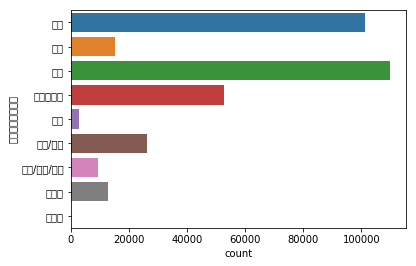

In [0]:
# (ggplot(df_seoul)
#  + aes('상권업종대분류명')
#  + geom_bar(fill='#8181F7')
#  + ggtitle('상권업종대분류명')
#  + coord_flip()
#  + theme(text=element_text(family='NanumBarunGothic'),
#         axis_text_x=element_text(rotation=60))
# )

sns.countplot(data=df_seoul,y="상권업종대분류명")

In [0]:
df_food=df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(109766, 39)

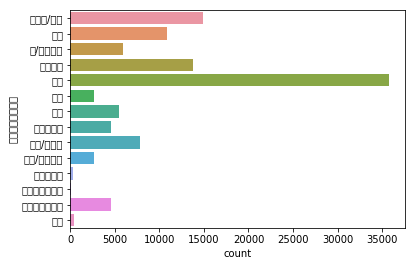

In [0]:
# (ggplot(df_food)
#  + aes('상권업종중분류명')
#  + geom_bar(fill='#817FEE')
#  + ggtitle('상권업종중분류명')
#  + coord_flip()
#  + theme(text=element_text(family='NanumBarunGothic'),
#         axis_text_x=element_text(rotation=60))
# )


sns.countplot(data=df_food,y="상권업종중분류명")

In [0]:
df_fast_food=df_food.loc[df_food['상권업종중분류명']=='패스트푸드']
df_fast_food.shape


(4605, 39)

In [0]:
df_food.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [0]:
df_fast_food['상호명'].unique()

array(['피자마루', '롯데리아', '배스킨라빈스', ..., '브리웰', '베이크럽', '델리'], dtype=object)

##배스킨라빈스와 던킨도너츠 입지분석

In [0]:
df_31=df_seoul[df_seoul['상호명'].str.contains('배스킨|던킨')].copy()
df_31.shape

(438, 39)

In [0]:
df_31=df_31[['상호명','지점명','상권업종대분류명','상권업종중분류명', 
               '지번주소','도로명주소',  '위도','경도','시군구명','행정동명']].copy()

In [0]:
df_31.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [0]:
df_31.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
63,배스킨라빈스,관악구청점,음식,패스트푸드,서울특별시 관악구 봉천동 863-13,서울특별시 관악구 관악로 161,37.479599,126.952166,관악구,청룡동
1564,던킨도너츠테크노마트점,테크노마트점,음식,패스트푸드,서울특별시 광진구 구의동 546-4,서울특별시 광진구 광나루로56길 85,37.535713,127.095681,광진구,구의3동
1921,던킨도너츠창동하나로,NaN,음식,패스트푸드,서울특별시 도봉구 창동 1-10,서울특별시 도봉구 마들로11길 20,37.655101,127.050818,도봉구,창4동
1958,던킨도너츠용산민자역사2호,NaN,음식,패스트푸드,서울특별시 용산구 한강로3가 40-999,서울특별시 용산구 한강대로21나길 7,37.527903,126.963223,용산구,한강로동
2459,던킨도너츠,잠실본동점,음식,패스트푸드,서울특별시 송파구 잠실동 242-9,서울특별시 송파구 석촌호수로 118,37.507431,127.090005,송파구,잠실본동


In [0]:
df_31['상호명'].value_counts()

배스킨라빈스31            102
던킨도너츠                86
배스킨라빈스               44
던킨도넛                  4
던킨도너츠당고개역사            1
배스킨라빈스31망우우림점         1
배스킨라빈스31영등포구청점        1
배스킨라빈스공릉점             1
배스킨라빈스31명일역점          1
배스킨라빈스영등포문래           1
던킨도너츠공릉역점             1
배스킨라빈스31선유도역          1
배스킨라빈스동대문홈플러스         1
배스킨라빈스31한양대점          1
배스킨라빈스31BROWN청담점      1
던킨도너츠동대문              1
배스킨라빈스31서울대입구역점       1
배스킨라빈스31노원로데오점        1
던킨도너츠테크노마트점           1
배스킨라빈스청량리역사점          1
배스킨라빈스신풍역             1
배스킨라빈스31홍대상상마당점       1
던킨도너츠김포공항국내선          1
배스킨라빈스31개봉푸르지오점       1
배스킨라빈스31연신내점          1
배스킨라빈스31명동1호점         1
배스킨라빈스31선릉점           1
배스킨라빈스31대학로점          1
던킨도너츠김포국제공항점          1
배스킨라빈스남성역점            1
                   ... 
던킨도너츠아이비케이            1
배스킨라빈스31성동금호점         1
던킨도너츠홍대점              1
배스킨라빈스31안국역점          1
배스킨라빈스31중랑역점          1
배스킨라빈스31도화점           1
던킨도너츠올림픽공원점           1
던킨도너츠압구정소망            1
배스킨라빈스31성수이마트점        1
배스킨라빈스31둔촌역점          1
배스킨라빈스31상계백병원점  

In [0]:
df_31[['상호명','브랜드명']].head()

KeyError: ignored

In [0]:
df_31.loc[df_31['상호명'].str.contains('배스킨'),'브랜드명']='배스킨라빈스'
df_31.loc[df_31['상호명'].str.contains('던킨'),'브랜드명']='던킨도너츠'

In [0]:
df_31[['상호명','브랜드명']].head()

,상호명,브랜드명
63,배스킨라빈스,배스킨라빈스
1564,던킨도너츠테크노마트점,던킨도너츠
1921,던킨도너츠창동하나로,던킨도너츠
1958,던킨도너츠용산민자역사2호,던킨도너츠
2459,던킨도너츠,던킨도너츠


In [0]:
df_31_group_count=df_31['브랜드명'].value_counts()
df_31_group_count

배스킨라빈스    290
던킨도너츠     148
Name: 브랜드명, dtype: int64

In [0]:
df_31_ratio=df_31_group_count[0]/df_31_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 {0:.2f}배가량 많습니다.'.format(df_31_ratio))

제공된 데이터로 봤을 때 서울에는 던킨도너츠보다 배스킨라빈스의 매장이 1.96배가량 많습니다.


In [0]:
df_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 63 to 476000
Data columns (total 11 columns):
상호명         438 non-null object
지점명         369 non-null object
상권업종대분류명    438 non-null object
상권업종중분류명    438 non-null object
지번주소        438 non-null object
도로명주소       438 non-null object
위도          438 non-null float64
경도          438 non-null float64
시군구명        438 non-null object
행정동명        438 non-null object
브랜드명        438 non-null object
dtypes: float64(2), object(9)
memory usage: 41.1+ KB


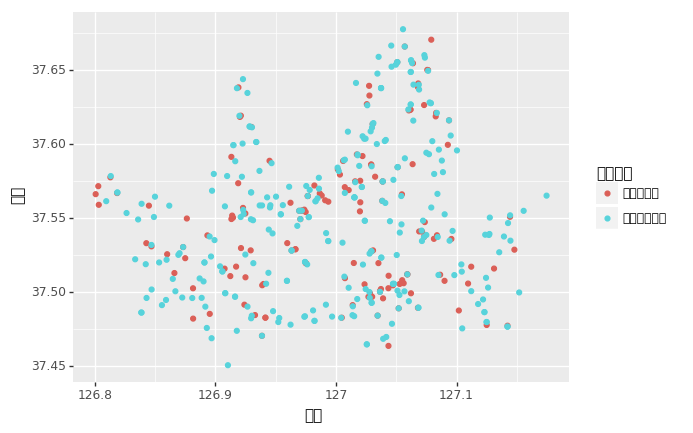

<ggplot: (8731564425704)>

In [0]:
# 같은 그래프를 여러가지 시각화 툴로 그려봅니다. plotnine을 사용해서 ggplot으로 그려본 사례
(ggplot(df_31)
+ aes(x='경도', y='위도', color='브랜드명')
+ geom_point()
+ theme(text=element_text(family='NanumBarunGothic'))
)


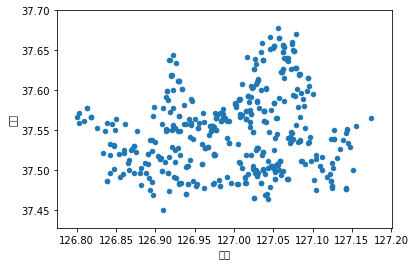

In [0]:
# Pandas 로 scatter plot 그리기
df_31.plot.scatter(x='경도',y='위도')

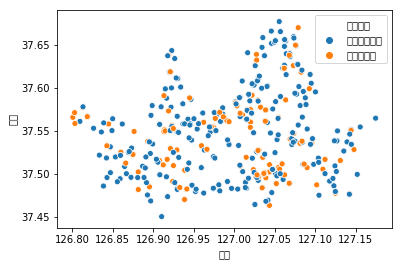

In [0]:
# seaborn 으로 scatter plot 그리기
sns.scatterplot(data=df_31,x='경도',y='위도',hue="브랜드명")

In [0]:
#folium.Map?

geo_df=df_31.copy()

 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정합니다.
 
우리가 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값을 구해옵니다.


In [0]:
map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=12)

In [0]:
for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name=geo_df.loc[n,'브랜드명']+' - '+geo_df.loc[n,'도로명주소']
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n]=='던킨도너츠':
        icon_color='pink'
    else:
        icon_color='blue'    
    
    folium.Marker([geo_df.loc[n,'위도'],geo_df.loc[n,'경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)


In [0]:
map

In [0]:
map=folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],zoom_start=12,tiles='Stamen Toner')

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    popup_name=geo_df['브랜드명'][n]+' - '+geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상을 달리해서 찍어줍니다.
    if geo_df['브랜드명'][n]=='던킨도너츠':
        icon_color='red'
    else:
        icon_color='blue'    

        
map